# Cal-Adapt Analytics Engine: Timeseries Transformations

**Intended Application**: As a user, I want to **<span style="color:#FF0000">analyze climate timeseries data</span>** by:
1. Computing trends of importance to my region of interest in a climatologically-appropriate manner

**Runtime**: With the default settings, this notebook takes approximately **less than 1 minute** to run from start to finish. Modifications to selections may increase the runtime.

## Step 0: Setup

In [1]:
import climakitae as ck
import climakitaegui as ckg

## Step 1: Select
In order to work with the timeseries tools, select `Historical Climate` and `one of the SSP timeseries options`. The historical data will be automatically appended to a SSP time series when both are selected, and select "yes" for `area averaging`.

To learn more about the data available on the Analytics Engine, [see our data catalog](https://analytics.cal-adapt.org/data/). 

Row
    [0] Card(collapsible=False, styles={'header_background': 'lig...}, title='Data Options i..., width=600)
        [0] Column
            [0] Row
                [0] Column(width=200)
                    [0] StaticText(name='Data Type')
                    [1] RadioBoxGroup(options=OrderedDict({'Gridded': 'G...]), value='Gridded')
                [1] Column(width=200)
                    [0] StaticText(name='Approach')
                    [1] RadioBoxGroup(options=OrderedDict({'Time': 'Time...]), value='Time')
                [2] Column(width=200)
                    [0] StaticText(name='Downscaling Method')
                    [1] RadioBoxGroup(name='Downscaling method', options=OrderedDict({'Dynamical': ...]), value='Dynamical')
        [1] Divider(margin=(-10, 0, 0, 0))
        [2] Row
            [0] Column(width=300)
                [0] StaticText(name='Variable Type')
                [1] RadioBoxGroup(inline=True, options=OrderedDict({'Variable': '...]), value='Variable')
                [2] Select(options=OrderedDict({'Air Temperat...]), value='Air Temperature at 2m', width=225)
                [3] StaticText(value="Temperature o...)
            [1] Column
                [0] Row
                    [0] Column(width=100)
                        [0] StaticText(name='Variable Units')
                        [1] RadioBoxGroup(name='Units', options=OrderedDict({'K': 'K', ...]), value='K')
                    [1] Column(width=100)
                        [0] StaticText(name='Timescale')
                        [1] RadioBoxGroup(options=OrderedDict({'daily': 'dai...]), value='monthly')
                    [2] Column(width=100)
                        [0] StaticText(name='Model Grid-Spacing')
                        [1] RadioBoxGroup(name='Resolution', options=OrderedDict({'3 km': '3 km...]), value='9 km')
                [1] Column(width=300)
                    [0] StaticText(styles={'color': 'red'})
        [3] Divider(margin=(-10, 0, 0, 0))
        [4] Column
            [0] StaticText(name='WARMING LEVELS APPROACH', value='Options only v...)
            [1] Row
                [0] Column(width=270)
                    [0] StaticText(name='Years around G..., value='e.g. 15 means a...)
                    [1] IntSlider(end=25, start=5, value=15, width=240)
                [1] Column(width=250)
                    [0] StaticText(name='Warming Level (°C)')
                    [1] CheckBoxGroup(inline=True, options=OrderedDict({'n/a': '...]), value=['n/a'])
        [5] Divider(margin=(-10, 0, 0, 0))
        [6] Column
            [0] StaticText(name='TIME-BASED APPROACH', value='Options only v...)
            [1] Row
                [0] Column(width=300)
                    [0] StaticText(name='Years', value='How do you want t...)
                    [1] RangeSlider(end=2100, start=1950, step=1, value=(1980, 2100), value_end=2100, value_start=1980, width=250)
                    [2] StaticText(name='Historical Data', value='<br>Estimates o...)
                    [3] CheckBoxGroup(name='Scenario historical', options=OrderedDict({'Historical C...]), value=['Historical Climate'])
                    [4] StaticText(name='Future Model Data', value='<br> Shared S...)
                    [5] CheckBoxGroup(name='Scenario ssp', options=OrderedDict({'SSP 2-4.5': ...]), value=['SSP 3-7.0'])
                [1] Column(width=300)
                    [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                    [1] StaticText(styles={'color': 'red'})
    [1] Card(collapsible=False, height=670, sizing_mode='fixed', styles={'header_background': 'lig...}, title='Location Options f..., width=635)
        [0] Row
            [0] Column(width=280)
                [0] ParamMethod(method, _pane=Matplotlib, defer_load=False)
                [1] Select(name='Subset the data by...', options=OrderedDict({'none': 'none...]), value='none', width=225)
                [2] MultiSelect(name='Location selection', options=OrderedDict({'
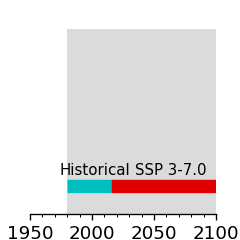
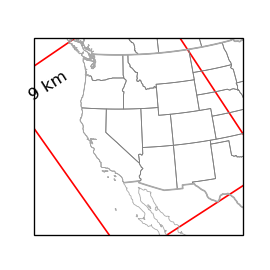

In [2]:
selections = ckg.Select()
selections.area_average = "Yes"
selections.scenario_ssp = ['SSP 3-7.0']
selections.show()

## Step 2: Retrieve

In [3]:
my_data = selections.retrieve()

/home/jovyan/src/climakitae/climakitae/core/data_load.py:1570: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  da_adj["time"] = da_adj.indexes["time"].to_datetimeindex()
/home/jovyan/src/climakitae/climakitae/core/data_load.py:1570: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  da_adj["time"] = da_adj.indexes["time"].to_datetimeindex()
/home/jovyan/src/climakitae/climakitae/core/data_load.py:1570: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This m

KeyboardInterrupt: 

In [ ]:
my_data

For the timeseries 'explore' function, we first need to load the dataset, so that the subsequent operations will be speedy. To do this, we'll use the `ck.load()` function in climakitae.

The `retrieve` step above previews, but does not compute, the aggregation of all the selected data into timeseries. This may take a few minutes.

In [ ]:
my_data = ck.load(my_data)

In [ ]:
my_data

## Steps 3 & 4: Visualize and Transform

In [12]:
import climakitaegui.explore.timeseries as tst
timeseries = tst.TimeSeries(my_data)

Preview various transforms on the data in real time. The below panel walks through several options for transforming your time series, such as:
- Comparing the difference between the variable of interest and a 30-year historical baseline of January 1, 1981 to December 31, 2010. You can also select your own baseline range of interest out to 12/31/2021.
- Removing the seasonal cycle (removing the mean monthly signal in each month) to view within-year patterns independent from the impact of seasonality.
- Smooth your timeseries to remove noise with a running average, by specifying the number of timesteps to average over (for example you may want to average over 1, 3, 5, or 10 years). This option is only recommended if you want to examine changes in mean conditions.
- Choose the disaggregate into four seasons option to examine patterns in a given season (data is grouped into December-January-February, March-April-May, June-July-August, or September-October-November, which can be toggled between in a dropdown menu at the bottom of the panel).

You may also choose to explore patterns in the minimum, maximum, or an extreme of your choice (defined by the percentile slider: e.g. temperatures above the 90th percentile)
- If you choose to look at extremes, you can change the resampling window and period to assess how extreme a pattern is over a time period of your own choosing
    - For example, you may want to examine the annual minimum, in which we would recommend selecting “min”, 1 for the window, and “years” for the resample period. 
    - Likewise, if you were interested in the decadal maximum, you would select “max”, 10 for the window, and “years” for the period

Examples of climatological interest: 
- Hourly: Consider 6, 12, or 24 hour events
- Daily: Consider 3 day (heat wave length events), 7 day (week long), 14 day (biweekly), or 30 day events
- Monthly: Consider sub-annual and seasonal scales, where 3, 6, 12 months could represent seasonal or dry/wet season interest periods
- Yearly: Consider 5, 10 year intervals and beyond to assess long-term climatology trends

Please note, the figure may take a few minutes to update with your selections. 

In [13]:
timeseries.explore()

Card(collapsible=False, styles={'header_background': 'lig...}, title='Timeseries Explorer')
    [0] Column
        [0] Row
            [0] Column
                [0] StaticText(value='Transformation Options')
                [1] Checkbox(name='Difference from a..., value=True)
                [2] DateRangeSlider(end=datetime.datetime(2021, ..., name='Reference range', start=datetime.datetime(1980, ..., value=(datetime.datetime(1981, ..., value_end=datetime.datetime(2010, ..., value_start=datetime.datetime(1981, ..., width=200)
                [3] Checkbox(name='Remove seasonal cycle')
                [4] Checkbox(name='Disaggregate i...)
                [5] Select(name='Smoothing', options=OrderedDict({'None': 'None...]), value='None', width=200)
                [6] IntSlider(end=240, name='Num timesteps', width=200)
                [7] Spacer(height=10)
            [1] Spacer(width=50)
            [2] Column
                [0] CheckBoxGroup(name='Extremes', options=OrderedDict({'Min': 'Min',...]))
                [1] FloatSlider(name='Percentile', step=0.01, width=200)
                [2] Row(width=400)
                    [0] IntSlider(end=30, name='Resample window', start=1, value=1, width=200)
                    [1] Select(name='Resample period', options=OrderedDict({'months': 'MS...]), value='MS', width=200)
                [3] StaticText(value='Smoothing applies a...)
                [4] StaticText(value='The resample w...)
        [1] ParamMethod(method, _pane=Column, defer_load=False)

And then output whatever the current state is to another variable:

In [8]:
transformed = timeseries.output_current()

AttributeError: 'TimeSeriesParameters' object has no attribute 'get_param_values'

In [ ]:
transformed

## Step 5: Export

To save data as a file, call `export` and input your desired
1) data to export – an [xarray DataArray or Dataset](https://docs.xarray.dev/en/stable/user-guide/data-structures.html), as output by e.g. selections.retrieve()
2) output file name (without file extension)
3) file format ("NetCDF" or "CSV")

To learn more about the file format options, see [getting_started.ipynb](getting_started.ipynb).

In [ ]:
ck.export(transformed, "my_filename", "NetCDF")